<img height="60" width="120" src="https://shwetkm.github.io/upxlogo.png"></img>
# UpX Academy - Machine Learning Track
# Principal Component Analysis

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
student_data_mat   = pd.read_csv("student-mat.csv",delimiter=";")
student_data_por   = pd.read_csv("student-por.csv",delimiter=";")
student_data = pd.merge(student_data_mat,student_data_por,how="outer")
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4.0,4.0,at_home,teacher,...,4.0,3.0,4.0,1.0,1.0,3.0,6.0,5.0,6.0,6.0
1,GP,F,17.0,U,GT3,T,1.0,1.0,at_home,other,...,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5.0,5.0,6.0
2,GP,F,15.0,U,LE3,T,1.0,1.0,at_home,other,...,4.0,3.0,2.0,2.0,3.0,3.0,10.0,7.0,8.0,10.0
3,GP,F,15.0,U,GT3,T,4.0,2.0,health,services,...,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15.0,14.0,15.0
4,GP,F,16.0,U,GT3,T,3.0,3.0,other,other,...,4.0,3.0,2.0,1.0,2.0,5.0,4.0,6.0,10.0,10.0


In [3]:
col_str = student_data.columns[student_data.dtypes == object]

In [4]:
student_data = pd.get_dummies(student_data, columns = col_str, drop_first = True)
student_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 1043
Data columns (total 42 columns):
age                  1044 non-null float64
Medu                 1044 non-null float64
Fedu                 1044 non-null float64
traveltime           1044 non-null float64
studytime            1044 non-null float64
failures             1044 non-null float64
famrel               1044 non-null float64
freetime             1044 non-null float64
goout                1044 non-null float64
Dalc                 1044 non-null float64
Walc                 1044 non-null float64
health               1044 non-null float64
absences             1044 non-null float64
G1                   1044 non-null float64
G2                   1044 non-null float64
G3                   1044 non-null float64
school_MS            1044 non-null float64
sex_M                1044 non-null float64
address_U            1044 non-null float64
famsize_LE3          1044 non-null float64
Pstatus_T            1044 non-nul

In [5]:
print(student_data[["G1","G2","G3"]].corr())

          G1        G2        G3
G1  1.000000  0.858739  0.809142
G2  0.858739  1.000000  0.910743
G3  0.809142  0.910743  1.000000


In [6]:
 # Since, G1,G2,G3 have very high correlation, we can drop G1,G2
student_data.drop(axis = 1,labels= ["G1","G2"])

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18.0,4.0,4.0,2.0,2.0,0.0,4.0,3.0,4.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,17.0,1.0,1.0,1.0,2.0,0.0,5.0,3.0,3.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,15.0,1.0,1.0,1.0,2.0,3.0,4.0,3.0,2.0,2.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
3,15.0,4.0,2.0,1.0,3.0,0.0,3.0,2.0,2.0,1.0,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,16.0,3.0,3.0,1.0,2.0,0.0,4.0,3.0,2.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
5,16.0,4.0,3.0,1.0,2.0,0.0,5.0,4.0,2.0,1.0,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
6,16.0,2.0,2.0,1.0,2.0,0.0,4.0,4.0,4.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
7,17.0,4.0,4.0,2.0,2.0,0.0,4.0,1.0,4.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
8,15.0,3.0,2.0,1.0,2.0,0.0,4.0,2.0,2.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
9,15.0,3.0,4.0,1.0,2.0,0.0,5.0,5.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [7]:
label = student_data["G3"].values
predictors = student_data.drop(axis = 1,labels= ["G3"]).values

In [8]:
pca = PCA(n_components=len(student_data.columns)-1)
pca.fit(predictors)
variance_ratio = pca.explained_variance_ratio_

[  51.39   75.61   79.04   81.94   84.53   86.42   88.22   89.88   90.92
   91.93   92.77   93.48   94.12   94.67   95.18   95.62   95.97   96.3
   96.63   96.94   97.24   97.53   97.78   98.     98.21   98.41   98.6
   98.79   98.96   99.12   99.26   99.38   99.5    99.61   99.7    99.78
   99.86   99.91   99.96   99.99  100.  ]


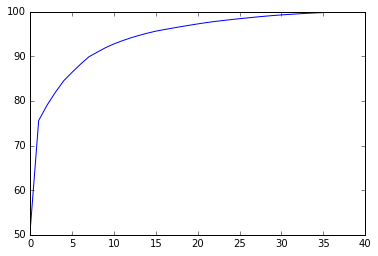

In [9]:
variance_ratio_cum_sum=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(variance_ratio_cum_sum)
plt.plot(variance_ratio_cum_sum)

In [10]:
#Looking at above plot I'm taking 10 variables
pca = PCA(n_components=10)
pca.fit(predictors)
Transformed_vector =pca.fit_transform(predictors)
print(Transformed_vector)

[[  2.55386268e+00   7.47453817e+00  -1.14123174e+00 ...,  -8.17768748e-01
    6.82778654e-01   1.81654823e-01]
 [  5.78881858e-01   8.75537167e+00  -2.22041500e+00 ...,  -1.18007290e+00
    4.14045833e-01  -7.80380651e-01]
 [  6.14374965e+00   4.69979496e+00  -1.04475749e+00 ...,   1.00954410e-03
   -5.42122667e-01  -2.43734393e-01]
 ..., 
 [  1.45167665e+00  -4.53844224e-01  -2.42841505e+00 ...,   2.41693464e+00
    5.45071914e-01   2.05822333e+00]
 [  1.90452810e+00   1.76341464e+00   2.17164180e+00 ...,   5.42373134e-01
   -2.50051266e-01   1.31052296e+00]
 [ -2.16704599e-01   1.26199417e+00   1.69344195e+00 ...,   1.35214862e+00
   -2.49455548e+00  -5.68028248e-01]]


In [11]:
lr_pca = linear_model.LinearRegression()

In [12]:
score_lr_pca = cross_val_score(lr_pca, Transformed_vector, label, cv=5)
print("PCA Model Cross Validation score : " + str(score_lr_pca))
print("PCA Model Cross Validation Mean score : " + str(score_lr_pca.mean()))

PCA Model Cross Validation score : [ 0.87933415  0.7308291   0.73458216  0.82637385  0.8215229 ]
PCA Model Cross Validation Mean score : 0.798528432619


In [13]:
lr = linear_model.LinearRegression()
score_lr = cross_val_score(lr, predictors, label, cv=5)
print("LR Model Cross Validation score : " + str(score_lr))
print("LR Model Cross Validation Mean score : " + str(score_lr.mean()))

LR Model Cross Validation score : [ 0.87907056  0.71869955  0.72511625  0.77999502  0.81870136]
LR Model Cross Validation Mean score : 0.784316548612
